# Plotting the MT and MT2 distributions resulting from top pair production

Plotting MT and MT2 distributions for the process:

 p p > t tbar, (t > l+ vl b), (tbar > l- vlbar bbar)


i.e. allowing the W's to be off-shell

In [1]:
import awkward as ak
import hist
import numpy as np
import pylhe

from mt2 import mt2

### Input files, parameters

In [2]:
dirname = '/Users/maevemadigan/Documents/*Work/*TopAlps/TopAlps/Madgraph/ttbar_offshell/Events/run_08/'

### Histogram normalisations

In [3]:
def read_sigma_nevents(dirname):
    filename = dirname + dirname.split('/')[-2]+'_tag_1_banner.txt'
    with open(filename,'r') as f:
        data = f.readlines()
    f.close()
    sigma = float(data[-4].split(' ')[-1])
    nevents = float(data[-5].split(' ')[-1])
    return sigma, nevents

Obtain normalisation factors for each histogram

In [4]:
sigma, nevents = read_sigma_nevents(dirname)

ww = 1/nevents

### Load events 

In [5]:
pylhe.register_awkward()
arr = pylhe.to_awkward(pylhe.read_lhe_with_attributes(dirname+"unweighted_events.lhe"))

Identify leptons and neutrinos

In [6]:
#Start by setting indices based on lhe file

indL1 = -3
indL2 = -6
indV1 = -2
indV2 = -5


#Test whether these are correct
for procid in range(int(nevents)):
        
        if((arr.particles.id[procid,indL1]==12.0) or (arr.particles.id[procid,indL1]==14.0)):
            print('err 1')
        elif((arr.particles.id[procid,indL2]==-12.0) or (arr.particles.id[procid,indL2]==-14.0)):
            print('err 2')
        elif((arr.particles.id[procid,indV1]==11.0) or (arr.particles.id[procid,indV1]==13.0)):
            print('err 3')
        elif((arr.particles.id[procid,indV2]==-11.0) or (arr.particles.id[procid,indV2]==-13.0)):
            print('err 4')
        
            
#Define the lepton and neutrino vectors            
vecL1 = arr.particles.vector[:,indL1]
vecL2 = arr.particles.vector[:,indL2]
vecV1 = arr.particles.vector[:,indV1]
vecV2 = arr.particles.vector[:,indV2]

In [7]:
MT1 = np.sqrt(2*np.sqrt((vecL1.px**2 + vecL1.py**2)*(vecV1.px**2 + vecV1.py**2)) - 2*(vecL1.px*vecV1.px + vecL1.py*vecV1.py))
MT2 = np.sqrt(2*np.sqrt((vecL2.px**2 + vecL2.py**2)*(vecV2.px**2 + vecV2.py**2)) - 2*(vecL2.px*vecV2.px + vecL2.py*vecV2.py))

Plot histograms!

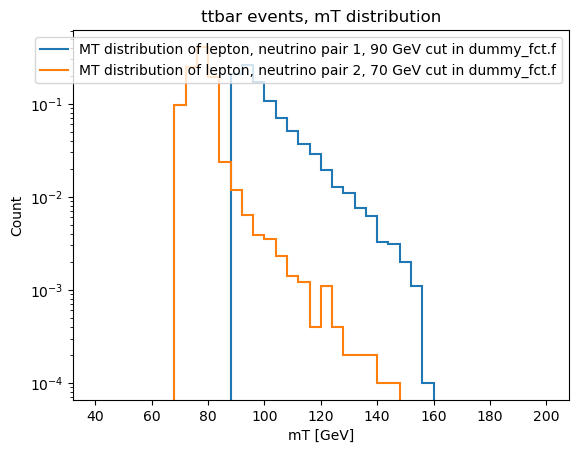

In [8]:
axis1 = hist.axis.Regular(bins=40, start=40, stop=200, name="MT");
hist1 = hist.Hist(axis1);
hist1.fill(MT=MT1, weight=ww);

axis2 = hist.axis.Regular(bins=40, start=40, stop=200, name="MT");
hist2 = hist.Hist(axis2);
hist2.fill(MT=MT2, weight=ww);

artists = hist1.plot1d(label='MT distribution of lepton, neutrino pair 1, 90 GeV cut in dummy_fct.f');
artists = hist2.plot1d(label='MT distribution of lepton, neutrino pair 2, 70 GeV cut in dummy_fct.f');
ax = artists[0].stairs.axes;
ax.set_yscale("linear");
ax.set_xlabel(r"");
ax.set_ylabel("Count");
ax.set_title('ttbar events, mT distribution');
ax.set_xlabel('mT [GeV]');
ax.set_yscale('log')
ax.legend()

Compute MT2 variable:

In [9]:
massL1 = 0.105
massL2 = 0.105

pxL1 = vecL1.px
pyL1 = vecL1.py
pxL2 = vecL2.px
pyL2 = vecL2.py

# Invisible things
# neutrinos are at index 7,10
# Assume massless

vecMiss = vecV1 + vecV2
pmiss_x = vecMiss.px
pmiss_y = vecMiss.py

mmiss1 = 0.01
mmiss2 = 0.01

In [10]:
val_tt = mt2(
        massL1, pxL1, pyL1,  # Visible 1: mass, px, py
    massL2, pxL2, pyL2,  # Visible 2: mass, px, py
    pmiss_x, pmiss_y,  # Missing transverse momentum: x, y
    mmiss1, mmiss2)  # Invisible 1 mass, invisible 2 mass

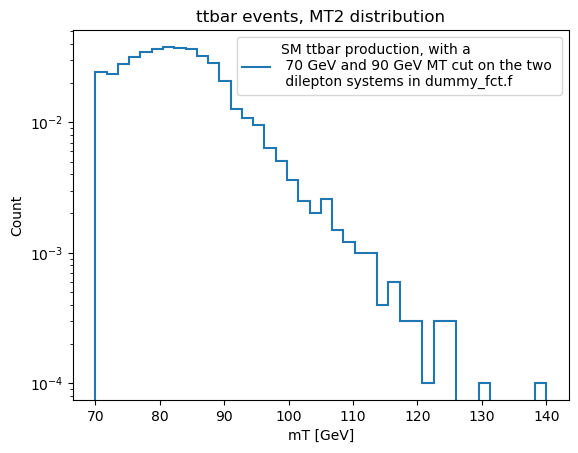

In [11]:
axis4 = hist.axis.Regular(bins=40, start=70, stop=140, name="MT2_with2cuts");
hist4 = hist.Hist(axis4);
hist4.fill(MT2_with2cuts=val_tt, weight=ww);


artists = hist4.plot1d(label='SM ttbar production, with a \n 70 GeV and 90 GeV MT cut on the two \n dilepton systems in dummy_fct.f');
ax = artists[0].stairs.axes;
ax.set_yscale("linear");
ax.set_xlabel(r"");
ax.set_ylabel("Count");
ax.set_title('ttbar events, MT2 distribution');
ax.set_xlabel('mT [GeV]');
ax.set_yscale('log')
ax.legend();